In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
books=pd.read_csv("Books.csv")
ratings=pd.read_csv("Ratings.csv")
users=pd.read_csv("Users.csv")

C:\Users\ACER\AppData\Local\Temp\ipykernel_10164\2055901106.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books=pd.read_csv("Books.csv")


In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
ratings.head() 

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
users.shape

(278858, 3)

In [7]:
books.shape

(271360, 8)

In [8]:
ratings.shape

(1149780, 3)

# EDA

In [9]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [10]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [11]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

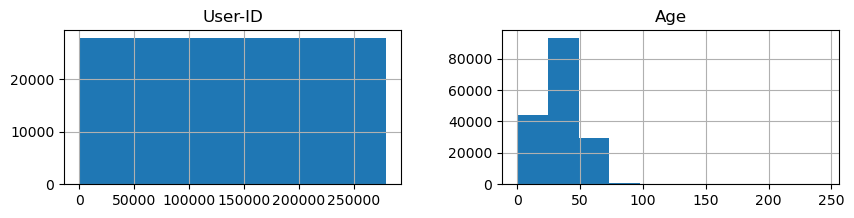

In [12]:
users.hist(figsize=(10,2))
plt.show()

In [13]:
agem=users.Age.mean()
users["Age"]=users.Age.fillna(agem)
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",34.751434
1,2,"stockton, california, usa",18.000000
2,3,"moscow, yukon territory, russia",34.751434
3,4,"porto, v.n.gaia, portugal",17.000000
4,5,"farnborough, hants, united kingdom",34.751434
...,...,...,...
278853,278854,"portland, oregon, usa",34.751434
278854,278855,"tacoma, washington, united kingdom",50.000000
278855,278856,"brampton, ontario, canada",34.751434
278856,278857,"knoxville, tennessee, usa",34.751434


In [14]:
users=users.drop(['Location'],axis='columns')

In [15]:
users.head()

,User-ID,Age
0,1,34.751434
1,2,18.000000
2,3,34.751434
3,4,17.000000
4,5,34.751434


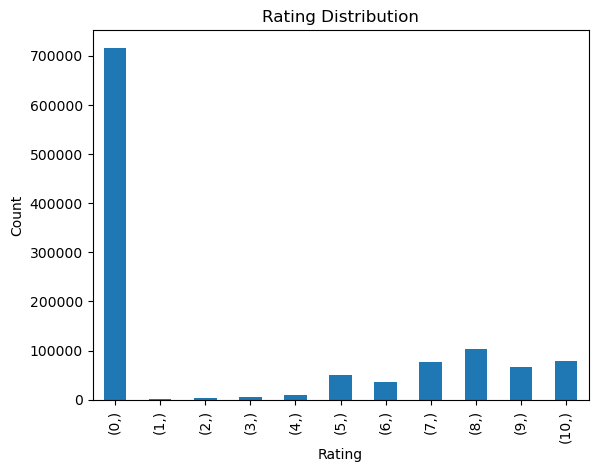

In [16]:
plt.rc("font", size=10)
ratings[['Book-Rating']].value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Popularity based

In [17]:
books_nd_ratings=ratings.merge(books,on='ISBN')

In [18]:
books_nd_ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...
1031132,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
1031133,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...
1031134,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...


### number of ratings

In [19]:
number_of_ratings=books_nd_ratings.groupby('Book-Title').count()['Book-Rating'].reset_index()
number_of_ratings=number_of_ratings.rename(columns={'Book-Rating':'no_of_ratings'})
number_of_ratings

,Book-Title,no_of_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [20]:
most_rated=number_of_ratings.sort_values(by='no_of_ratings',ascending=False).head(10)
most_rated

,Book-Title,no_of_ratings
234951,Wild Animus,2502
196326,The Lovely Bones: A Novel,1295
183573,The Da Vinci Code,898
5303,A Painted House,838
199237,The Nanny Diaries: A Novel,828
27922,Bridget Jones's Diary,815
206502,The Secret Life of Bees,774
52983,Divine Secrets of the Ya-Ya Sisterhood: A Novel,740
204387,The Red Tent (Bestselling Backlist),723
14392,Angels &amp; Demons,670


### Books with highest number of ratings

In [21]:
my_color_pal = [
    'MediumSeaGreen',
    'LightSeaGreen',
    'MediumAquaMarine',
    'LightSkyBlue',
    'LightSteelblue',
    'PowderBlue',
    'Plum',
    'LightSalmon',
    'LightPink',
    'Moccasin',
]

Text(0.5, 0, 'Number of Ratings')

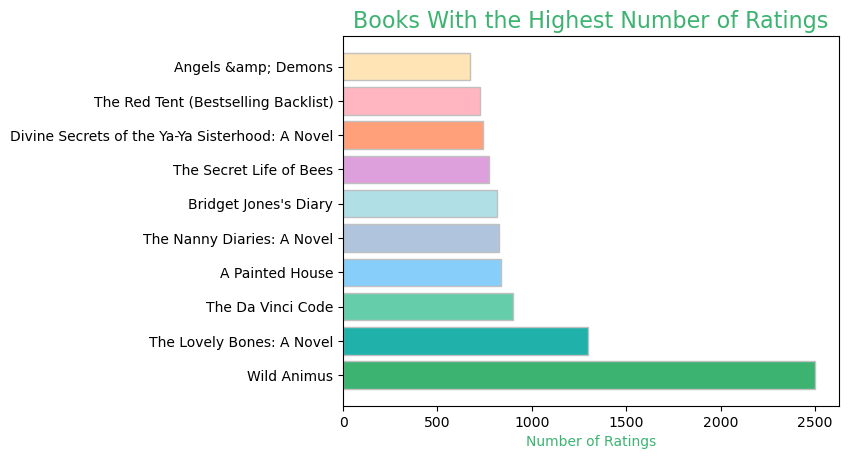

In [22]:
y=most_rated['Book-Title']
x=most_rated['no_of_ratings']
most_viz = plt.barh(y, x, color=my_color_pal, edgecolor='silver')
plt.title('Books With the Highest Number of Ratings',
          fontsize=16, color='MediumSeaGreen')
plt.xlabel('Number of Ratings', fontsize=10, color='MediumSeaGreen')

### Average of ratings

In [23]:
avg_of_ratings=books_nd_ratings.groupby('Book-Title').median()['Book-Rating'].reset_index()
avg_of_ratings=avg_of_ratings.rename(columns={'Book-Rating':'avg_of_ratings'})
avg_of_ratings

,Book-Title,avg_of_ratings
0,A Light in the Storm: The Civil War Diary of ...,0.0
1,Always Have Popsicles,0.0
2,Apple Magic (The Collector's series),0.0
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.0
4,Beyond IBM: Leadership Marketing and Finance ...,0.0
...,...,...
241066,Ã?Â?lpiraten.,0.0
241067,Ã?Â?rger mit Produkt X. Roman.,6.5
241068,Ã?Â?sterlich leben.,7.0
241069,Ã?Â?stlich der Berge.,0.0


### Finding top 50 books

In [24]:
num_avg_ratings=number_of_ratings.merge(avg_of_ratings,on='Book-Title')

In [25]:
num_avg_ratings

,Book-Title,no_of_ratings,avg_of_ratings
0,A Light in the Storm: The Civil War Diary of ...,4,0.0
1,Always Have Popsicles,1,0.0
2,Apple Magic (The Collector's series),1,0.0
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.0
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.0
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.0
241067,Ã?Â?rger mit Produkt X. Roman.,4,6.5
241068,Ã?Â?sterlich leben.,1,7.0
241069,Ã?Â?stlich der Berge.,3,0.0


In [26]:
top_fifty=num_avg_ratings[num_avg_ratings['no_of_ratings']>=250].sort_values('avg_of_ratings',ascending=False).head(50)
top_fifty=top_fifty.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','no_of_ratings','avg_of_ratings','Image-URL-L']]

In [27]:
top_fifty['avg_of_ratings']=top_fifty['avg_of_ratings'].round(2)
top_fifty

,Book-Title,Book-Author,no_of_ratings,avg_of_ratings,Image-URL-L
0,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,387,8.0,http://images.amazon.com/images/P/0439139597.0...
2,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,347,8.0,http://images.amazon.com/images/P/043935806X.0...
6,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,428,8.0,http://images.amazon.com/images/P/0439136350.0...
9,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,278,8.0,http://images.amazon.com/images/P/0590353403.0...
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,556,7.5,http://images.amazon.com/images/P/0439064872.0...
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,281,7.0,http://images.amazon.com/images/P/0345339681.0...
17,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,260,7.0,http://images.amazon.com/images/P/0345339711.0...
28,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,368,7.0,http://images.amazon.com/images/P/0345339703.0...
37,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,575,7.0,http://images.amazon.com/images/P/059035342X.0...
39,The Lovely Bones: A Novel,Alice Sebold,1295,6.0,http://images.amazon.com/images/P/0316666343.0...


# Collaborative filtring based

In [28]:
# Counting the number of users who have rated books:

In [29]:
books_nd_ratings.groupby('User-ID').count()['Book-Rating']

User-ID
2          1
8         17
9          3
10         1
12         1
          ..
278846     1
278849     4
278851    23
278852     1
278854     8
Name: Book-Rating, Length: 92106, dtype: int64

### filtering out those who have rated more than 200 books:

In [30]:
fl=books_nd_ratings.groupby('User-ID').count()['Book-Rating']>200
fdus=fl[fl].index
fdus

Int64Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,
              6323,   6543,
            ...
            271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427,
            277639, 278418],
           dtype='int64', name='User-ID', length=811)

In [31]:
final_fd=books_nd_ratings[books_nd_ratings['User-ID'].isin(fdus)]
final_fd

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
15,77940,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
16,81977,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1030883,275970,1880837927,0,The Theology of the Hammer,Millard Fuller,1994,Smyth &amp; Helwys Publishing,http://images.amazon.com/images/P/1880837927.0...,http://images.amazon.com/images/P/1880837927.0...,http://images.amazon.com/images/P/1880837927.0...
1030884,275970,188717897X,0,The Ordeal of Integration: Progress and Resent...,Orlando Patterson,1998,Civitas Book Publisher,http://images.amazon.com/images/P/188717897X.0...,http://images.amazon.com/images/P/188717897X.0...,http://images.amazon.com/images/P/188717897X.0...
1030885,275970,1888889047,0,Pushcart's Complete Rotten Reviews &amp; Rejec...,Bill Henderson,1998,Pushcart Press,http://images.amazon.com/images/P/1888889047.0...,http://images.amazon.com/images/P/1888889047.0...,http://images.amazon.com/images/P/1888889047.0...
1030886,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...


### filtering out books with 50 or more ratings

In [32]:
fbs=final_fd.groupby('Book-Title').count()['Book-Rating']>=50
flbs=fbs[fbs].index
flbs

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=706)

In [33]:
final_bs=final_fd[final_fd['Book-Title'].isin(flbs)]
final_bs

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
69,11676,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
74,23768,0446520802,6,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
...,...,...,...,...,...,...,...,...,...,...
1026724,266865,0531001725,10,The Catcher in the Rye,Jerome David Salinger,1973,Scholastic Library Pub,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...,http://images.amazon.com/images/P/0531001725.0...
1027923,269566,0670809381,0,Echoes,Maeve Binchy,1986,Penguin USA,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...,http://images.amazon.com/images/P/0670809381.0...
1028777,271284,0440910927,0,The Rainmaker,John Grisham,1995,Island,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...,http://images.amazon.com/images/P/0440910927.0...
1029070,271705,B0001PIOX4,0,Fahrenheit 451,Ray Bradbury,1993,Simon &amp; Schuster,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...,http://images.amazon.com/images/P/B0001PIOX4.0...


### Pivot table of books with more than 50 ratings and users with more than 200 ratings

In [34]:
pt=final_bs.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')
pt.fillna(0,inplace=True)
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
from sklearn.metrics.pairwise import cosine_similarity

In [36]:
similar=cosine_similarity(pt)

In [37]:
similar.shape

(706, 706)

In [38]:
def recommend(book_name):
    #fetch index
    index=np.where(pt.index==book_name)[0][0]
    similar_books= sorted(list(enumerate(similar[index])),key=lambda x:x[1],reverse=True)[1:11]
    
    data=[]
    for i in similar_books:
        item=[]
        temp_df=books[books['Book-Title']==pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-L'].values))
        
        data.append(item)
        
    return data



In [39]:
recommend('Harry Potter and the Prisoner of Azkaban (Book 3)')

[['Harry Potter and the Goblet of Fire (Book 4)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439139597.01.LZZZZZZZ.jpg'],
 ['Harry Potter and the Chamber of Secrets (Book 2)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439064872.01.LZZZZZZZ.jpg'],
 ['Harry Potter and the Order of the Phoenix (Book 5)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/043935806X.01.LZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Book 1)",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0590353403.01.LZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/059035342X.01.LZZZZZZZ.jpg'],
 ['The Fellowship of the Ring (The Lord of the Rings, Part 1)',
  'J.R.R. TOLKIEN',
  'http://images.amazon.com/images/P/0345339703.01.LZZZZZZZ.jpg'],
 ["Charlotte's Web (Trophy Newbery)",
  'E. B. White',
  'http://images.amazon.com/images/P/0064400557.01.LZZZZZZZ.jpg'],
 ['Anne of Avon

In [40]:
pt.index[0]

'1984'

In [41]:
import pickle

In [42]:
pickle.dump(top_fifty,open('top_fifty.pkl','wb'))

In [43]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))
pickle.dump(similar,open('similar.pkl','wb'))

# age wise

In [44]:
df = pd.merge(ratings, users, on='User-ID')

In [45]:
df.head()

,User-ID,ISBN,Book-Rating,Age
0,276725,034545104X,0,34.751434
1,276726,0155061224,5,34.751434
2,276727,0446520802,0,16.000000
3,276729,052165615X,3,16.000000
4,276729,0521795028,6,16.000000


In [46]:
book_ratings = df.groupby('ISBN')['Book-Rating'].agg(['count', 'mean'])
book_ratings.columns = ['num_ratings', 'avg_rating']

In [47]:
books_with_ratings = pd.merge(books, book_ratings, on='ISBN')

In [48]:
books_with_ratings.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,num_ratings,avg_rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,1,0.000000
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,14,4.928571
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,3,5.000000
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,11,4.272727
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,1,0.000000


In [49]:
age_groups = pd.cut(df['Age'], bins=[0, 12, 18, 35, 50, 100], labels=['0-12','12-18', '18-35', '35-50', '50+'])

In [50]:
age_groups.head()

0    18-35
1    18-35
2    12-18
3    12-18
4    12-18
Name: Age, dtype: category
Categories (5, object): ['0-12' < '12-18' < '18-35' < '35-50' < '50+']

In [51]:
age_recommendations = {}

In [52]:
for group in age_groups.unique():
    top_books = books_with_ratings[df['ISBN'].isin(df.loc[age_groups == group, 'ISBN'])].nlargest(30,'avg_rating')
    age_recommendations[group] = top_books[['Book-Title', 'Book-Author', 'Image-URL-L']].to_dict('records')

C:\Users\ACER\AppData\Local\Temp\ipykernel_10164\953870874.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_books = books_with_ratings[df['ISBN'].isin(df.loc[age_groups == group, 'ISBN'])].nlargest(30,'avg_rating')
C:\Users\ACER\AppData\Local\Temp\ipykernel_10164\953870874.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_books = books_with_ratings[df['ISBN'].isin(df.loc[age_groups == group, 'ISBN'])].nlargest(30,'avg_rating')
C:\Users\ACER\AppData\Local\Temp\ipykernel_10164\953870874.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_books = books_with_ratings[df['ISBN'].isin(df.loc[age_groups == group, 'ISBN'])].nlargest(30,'avg_rating')
C:\Users\ACER\AppData\Local\Temp\ipykernel_10164\953870874.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_books = books_with_ratings[df['ISBN'].isin(df.loc[age_groups == group, 'ISBN'])].nlargest(3

In [53]:
for group, books in age_recommendations.items():
    print(f"Recommendations for {group} age group:")
    for i, book in enumerate(books):
        print(f"{i+1}. {book['Book-Title']} , {book['Book-Author']} , {book['Image-URL-L']}")
    print()

Recommendations for 18-35 age group:
1. The Adventures of Drew and Ellie: The Magical Dress , Charles Noland , http://images.amazon.com/images/P/1414035004.01.LZZZZZZZ.jpg
2. Prescription for Terror , Sandra Levy Ceren , http://images.amazon.com/images/P/0966986105.01.LZZZZZZZ.jpg
3. Der KÃ?Â¶nig in Gelb. , Raymond Chandler , http://images.amazon.com/images/P/3257207522.01.LZZZZZZZ.jpg
4. Die Mars- Chroniken. Roman in ErzÃ?Â¤hlungen. , Ray Bradbury , http://images.amazon.com/images/P/3257208634.01.LZZZZZZZ.jpg
5. Die Mechanismen der Freude. ErzÃ?Â¤hlungen. , Ray Bradbury , http://images.amazon.com/images/P/3257212429.01.LZZZZZZZ.jpg
6. Eine ganz normale AffÃ?Â¤re. , Joanna Trollope , http://images.amazon.com/images/P/3548254268.01.LZZZZZZZ.jpg
7. From the Earth: Chinese Vegetarian Cooking , Eileen Yin-Fei Lo , http://images.amazon.com/images/P/0026329859.01.LZZZZZZZ.jpg
8. Organic Chemistry (Saunders Golden Sunburst Series) , Stephen J. Weininger , http://images.amazon.com/images/P/003

In [54]:
pickle.dump(age_recommendations,open('age_recommendations.pkl','wb'))